In [1]:
#Questions

#Q1
#Do we include correlations between target variables? or just between features and target variables?

#Q2
#Do we do this for all numerical features? That's a ton of histograms

#Q3

#Q7/8
#Is it okay if we remove the country-year column? It's redundant information which would bias our classifier
#Remove instant and dteday from bike dataset? Doesn't carry important info. If not, how to standardize date?
#Remove ID from vid dataset?
#Do we do this for the target variables? Assuming no

In [66]:
#Q1a


#Targets: suicide_no and suicide/100k

#number of suicides highly correlated with population. For a fixed suicide rate, a higher population will result in a higher number of suicides
#suicide rate slightly correlated with number of suicides. suicide_rate = suicide_no/pop. Strength of the correlation depends on pop


#Q2a

import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

suic_df = pd.read_csv("archive/master.csv")
suic_profile = ProfileReport(suic_df, title="Suicide Profiling Report")
suic_profile.to_widgets()

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
#Q1b

#Targets: casual, registered, cnt

#High correlation between registered and cnt. This implies that most users are registered 
#Medium negative correlation between "workingday" and casual. Workingday is 1 if the day is a holiday/weekend, 0 o.w.
    #Implies that casual users tend to do most of their biking during the weekened/holidays - makes sense
    #since they're probably doing it as a chill activity, rather than a daily workout or a means to get to work/school

#All three have medium-high correlations with temp/atemp. People like biking in warmer weather
#Registered/cnt have medium-high correlations with year - most registered bikers were biking in 2012.
    # could imply that people have been using rental bikes more in more, so there were just more users in 2012 than 2011.

bike_df = pd.read_csv("Bike-Sharing-Dataset/day.csv")
bike_profile = ProfileReport(bike_df, title="Bike Sharing Profiling Report")
bike_profile.to_widgets()

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
#Q1c

#Target variables: utime (transcoding time)

#Transcoding time high correlated with total codec allocated memory for transcoding, and medium-high correlation
#transcoding width/height. It takes longer to transcode larger sequences, which also means that it takes more memory to
#transcode the sequence



vid_df = pd.read_csv("online_video_dataset/transcoding_mesurment.tsv", delimiter='\t')
vid_profile = ProfileReport(vid_df, title="Video Transcoding Profiling Report")
vid_profile.to_widgets()

Summarize dataset:   0%|          | 0/35 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

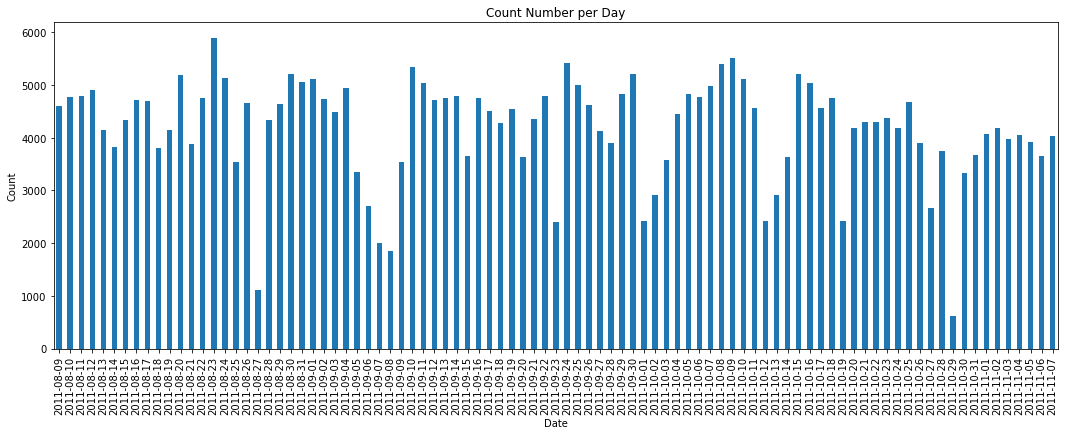

In [5]:
#Q4 
import matplotlib.pyplot as plt
trunc_bike_df = bike_df.truncate(before=220,after=310)
trunc_bike_df.plot(kind='bar',x='dteday',y='cnt', 
                   title='Count Number per Day',xlabel ='Date',
                  ylabel = 'Count',figsize = (18,6), legend = False)

plt.show()

#I picked some random indexes into the graph - not sure is this is the best one
#Looks like ridership goes way down on weekends, esp. Saturdays

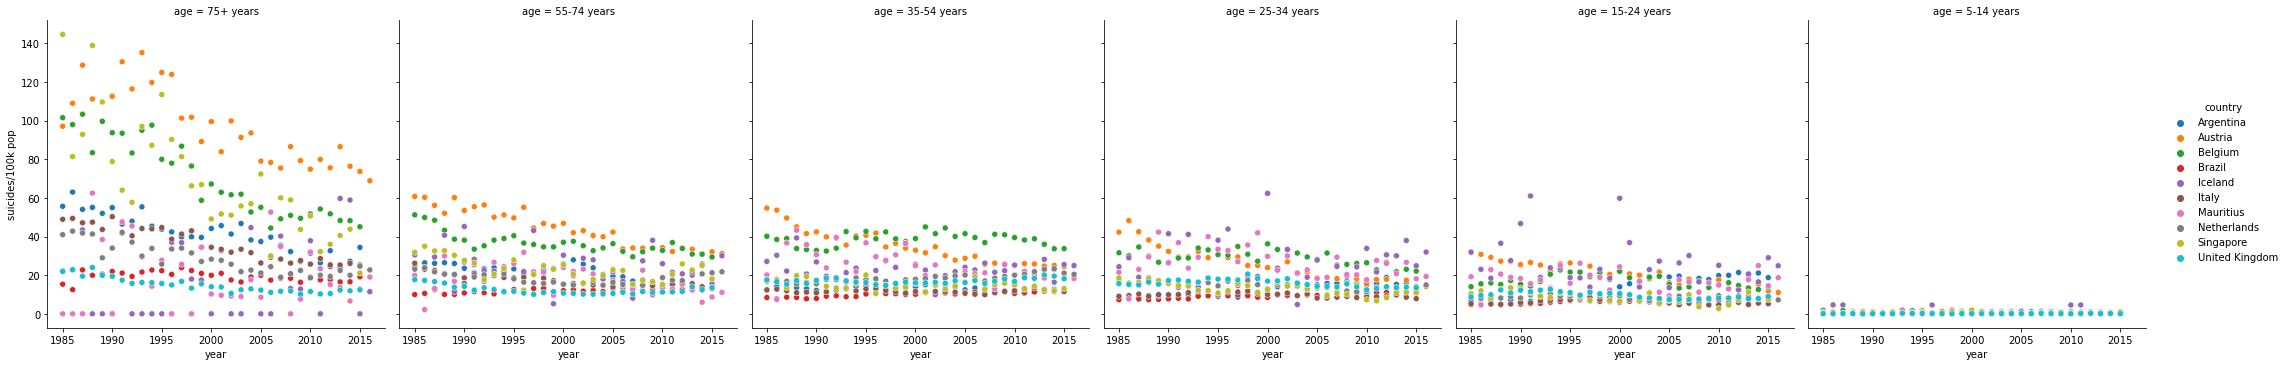

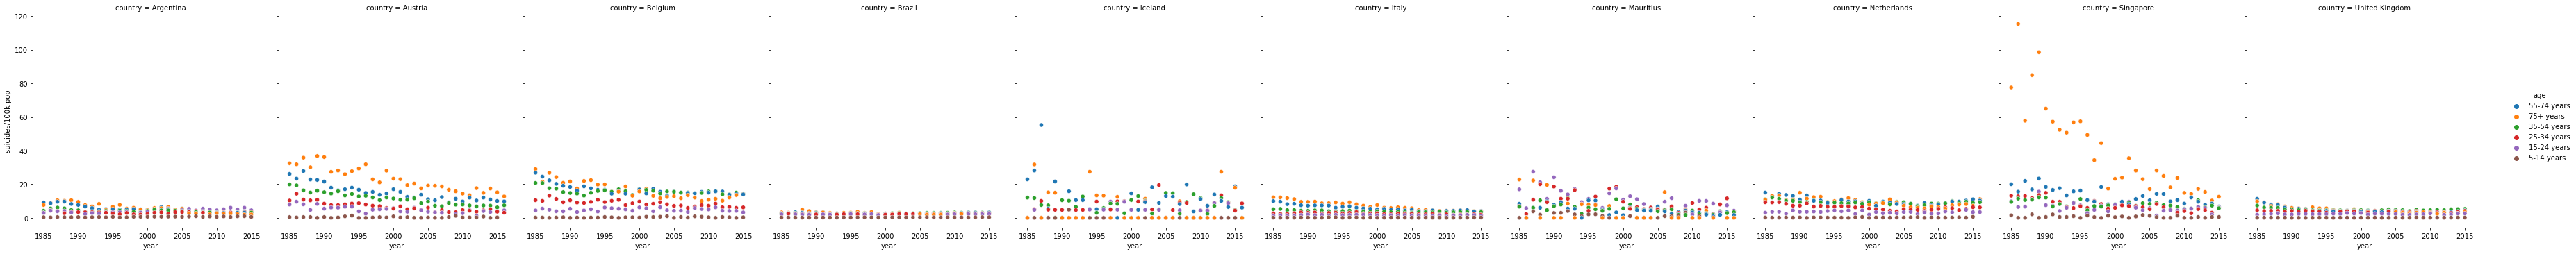

In [6]:
#Q5
import seaborn

top_countries = suic_df["country"].value_counts()[:10].index.tolist()
filtered_suic_df = suic_df[suic_df.country.isin(top_countries)]
male_df = filtered_suic_df[filtered_suic_df["sex"]=="male"]
female_df = filtered_suic_df[filtered_suic_df["sex"]=="female"]

#currently using two different ways of showing the data for male and female subsets
#should defintely pick just one (or a more granular one)

seaborn.relplot(data=male_df, x="year", y="suicides/100k pop", hue="country",col="age")
seaborn.relplot(data=female_df, x="year", y="suicides/100k pop", hue="age",col="country")

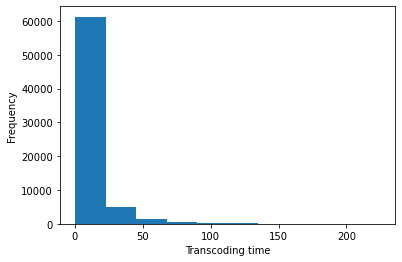

Mean: 9.996354820888579 s
Median: 4.408 s


In [7]:
#Q6
import matplotlib.pyplot as plt


#Most transcodings take very little time: between 0s and 10s

utime_vals = vid_df['utime'].to_numpy()
plt.hist(utime_vals)
plt.xlabel("Transcoding time")
plt.ylabel("Frequency")
plt.show()

print("Mean: {} s".format(np.mean(utime_vals)))
print("Median: {} s".format(np.median(utime_vals)))

In [89]:
#Q7, Q8

#What information does one-hot encoding discard?
#With numerical encoding: e.g. {1, 2, ... 12} for {Jan, Feb, ... Dec} we preserve distance information in the euclidean
#space between the months. We know that Jan and Mar surround Feb (not necessarily in that order).For encoding with one-hot encoding we 
#lose this information, and all months appear to be equidistant to each other. For some applications this doesn't matter,
#but it's definitely something that needs to be considered. For the quality feature vector {Poor, Fair, Typical, Good, Excellent} 
#if we proceed with one-hot encoding we also lose that distance information, so Excellent would be equidistant to
#Good and Poor, and we lose our sense of scale.

#What assumption should hold strongly if we perform the scalar encoding instead?


#Convert countries to continents:
#https://stackoverflow.com/questions/55910004/get-continent-name-from-country-using-pycountry

from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler


##### Suicide Dataset #####
def country_to_continent(country_name):
    try:
        item = country_alpha2_to_continent_code(country_name_to_country_alpha2(country_name))
        
    #Handle countries not in pycountry
    except KeyError:
        if (country_name == "Republic of Korea"):
            item = 'AS'
        elif (country_name == "Saint Vincent and Grenadines"):
            item = 'SA'
        else:
            print(country_name)
    return item


suic_df_preprocessed = suic_df.copy()

#Convert countries to a continent code
suic_df_preprocessed["country"] = suic_df_preprocessed["country"].apply(lambda x: country_to_continent(x))

#Remove country-year feature
suic_df_preprocessed = suic_df_preprocessed.drop(['country-year'], axis=1)

#Necessary because values with commas can't be converted to floats
suic_df_preprocessed[' gdp_for_year ($) ']=suic_df_preprocessed[' gdp_for_year ($) '].str.replace(',','')

#Preprocess all but suicide/100k
preprocess_suic = make_column_transformer(
    (StandardScaler(),['year', 'population', 'suicides_no', 'HDI for year', ' gdp_for_year ($) ', 'gdp_per_capita ($)']),
    (OneHotEncoder(sparse=False, categories='auto', handle_unknown='ignore'), ['country', 'sex', 'age', 'generation']),
    remainder='passthrough'
)

suic_df_preprocessed = preprocess_suic.fit_transform(suic_df_preprocessed)
#print(suic_df_preprocessed)



##### Bike Dataset #####
bike_df_preprocessed = bike_df.copy()

bike_df_preprocessed = bike_df_preprocessed.drop(['instant', 'dteday'], axis=1)

#Preprocess all but cnt
preprocess_bike = make_column_transformer(
    (StandardScaler(), bike_df_preprocessed.columns.drop(['cnt'])),
    remainder='passthrough'
)

bike_df_preprocessed = preprocess_bike.fit_transform(bike_df_preprocessed)
#print(bike_df_preprocessed)



##### Video Dataset #####

vid_df_preprocessed = vid_df.copy()

#Remove ID column. Carries no important information
vid_df_preprocessed = vid_df_preprocessed.drop(['id'], axis=1)

#Preprocess all but utime
preprocess_vid = make_column_transformer(
    (StandardScaler(), vid_df_preprocessed.columns.drop(['codec', 'o_codec', 'utime'])),
    (OneHotEncoder(sparse=False, categories='auto', handle_unknown='ignore'), ['codec', 'o_codec']),
    remainder='passthrough'
)

vid_df_preprocessed = preprocess_vid.fit_transform(vid_df_preprocessed)
#print(vid_df_preprocessed)